In [1]:
# %matplotlib notebook
import numpy as np
import copy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## 最適化関数

In [2]:
def function_1(x):
    return 1./20 * x[0]**2 + x[1]**2

def numerical_gradient(f, x):
    h = 1e-5
    grad = np.zeros_like(x)

    for i in range(x.size):
        tmp_val = x[i]

        x[i] = tmp_val + h
        fxh1 = f(x)

        x[i] = tmp_val - h
        fxh2 = f(x)

        grad[i] = (fxh1 - fxh2) / (2*h)
        x[i] = tmp_val

    return grad


def plot_history(f, history):
    x = np.linspace(-20, 20, 1000)
    y = np.linspace(-20, 20, 1000)
    x1, x2 = np.meshgrid(x, y)
    x3 = f([x1, x2])

    plt.contour(x1, x2, x3, levels=[i * 5.0 for i in range(1, 20)])
    plt.gca().set_aspect("equal")

    plt.plot([p[0] for p in history], [p[1] for p in history], marker="o")

    plt.show()


def plot3d_history(f, history):
    x = np.linspace(-20, 20, 1000)
    y = np.linspace(-20, 20, 1000)
    x1, x2 = np.meshgrid(x, y)
    x3 = f([x1, x2])
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(x1, x2, x3)
    
    p1, p2 = np.array([p[0] for p in history]), np.array([p[1] for p in history])
    p3 = f([p1, p2])
    ax.plot(p1, p2, p3, "o-", c="r", ms=4, mew=0.5)
    
    
def optimize(optimizer):
    X = np.array([-16.0, 10.0])
    
    pos = []
    for c in range(3000):
        pos.append(copy.deepcopy(X))
        g = numerical_gradient(function_1, X)
        optimizer.update(X, g)

    plot_history(function_1, pos)
    plot3d_history(function_1, pos)
    



## SGD

In [3]:
class SGD:
    def __init__(self, lr=0.01):
        self.lr = lr

    def update(self, params, grads):
        for i in range(params.size):
            params[i] -= self.lr * grads[i]

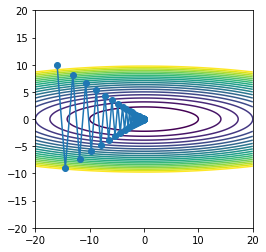

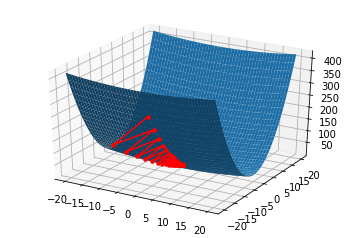

In [4]:
optimize(SGD(lr=0.95))

## Momentum

In [19]:
class Momentum:
    def __init__(self, lr=0.01, a=0.9):
        self.lr = lr
        self.a = a
        self.v = np.zeros(2)

    def update(self, params, grads):
        for i in range(params.size):
            self.v[i] = self.a * self.v[i] - self.lr * grads[i] 
            params[i] += self.v[i]

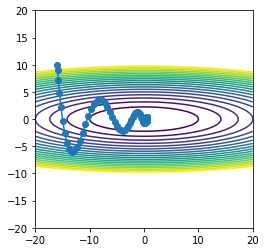

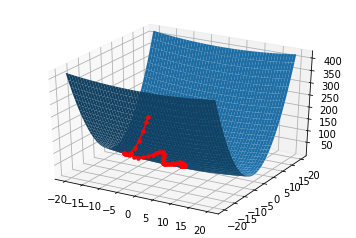

In [20]:
optimize(Momentum(lr=0.05, a=0.9))

## AdaGrad

In [21]:
class AdaGrad:
    def __init__(self, lr=0.001):
        self.lr = lr
        self.e = 1e-8
        self.h = np.zeros(2)

    def update(self, params, grads):
        for i in range(params.size):
            self.h[i] += grads[i] ** 2
            params[i] -= self.lr / (np.sqrt(self.h[i]) + self.e) * grads[i]


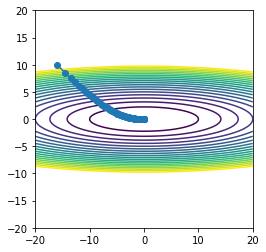

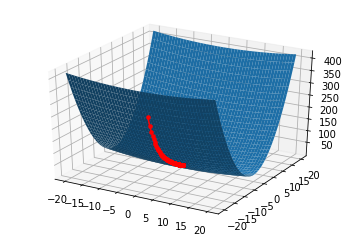

In [22]:
optimize(AdaGrad(lr=1.5))

## RMSProp

In [24]:
class RMSProp:
    def __init__(self, lr=0.01, a=0.99):
        self.lr = lr
        self.a = a
        self.e = 1e-8
        self.h = np.zeros(2)

    def update(self, params, grads):
        for i in range(params.size):
            self.h[i] = self.a * self.h[i] + (1 - self.a) * grads[i] ** 2
            params[i] -= self.lr / (np.sqrt(self.h[i]) + self.e) * grads[i]

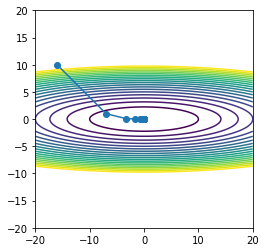

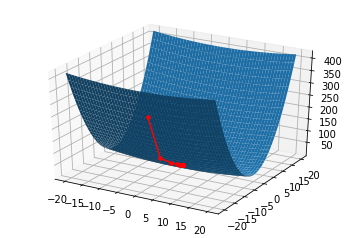

In [25]:
optimize(RMSProp(lr=0.9))

## AdaDelta

In [26]:
class AdaDelta:
    def __init__(self, p=0.95, e=1e-8):
        self.p = p
        self.e = e
        self.h = np.zeros(2)
        self.s = np.zeros(2)

    def update(self, params, grads):
        for i in range(params.size):
            self.h[i] = self.p * self.h[i] + (1 - self.p) * grads[i] ** 2
            v = np.sqrt(self.s[i] + self.e) / np.sqrt(self.h[i] + self.e) * grads[i]
            params[i] -= v
            self.s[i] = self.p * self.s[i] + (1 - self.p) * v ** 2

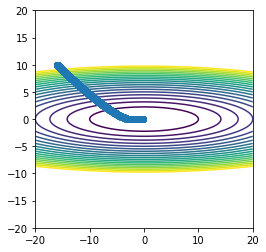

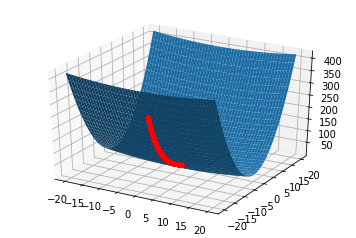

In [27]:
optimize(AdaDelta(e=1e-6))

## Adam

In [28]:
class Adam:
    def __init__(self, lr=0.001, b1=0.9, b2=0.999, e=1e-8):
        self.lr = lr
        self.b1 = b1
        self.b2 = b2
        self.e = e
        self.m = np.zeros(2)
        self.v = np.zeros(2)
        self.t = 1

    def update(self, params, grads):
        for i in range(params.size):
            self.m[i] = self.b1 * self.m[i] + (1 - self.b1) * grads[i]
            self.v[i] = self.b2 * self.v[i] + (1 - self.b2) * grads[i] ** 2
            mt = self.m[i] / (1 - self.b1 ** self.t)
            vt = self.v[i] / (1 - self.b2 ** self.t)
            params[i] -= self.lr * mt / (np.sqrt(vt) + self.e)
            self.t += 1

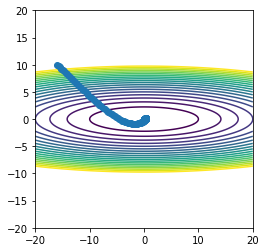

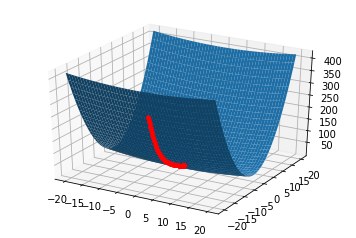

In [29]:
optimize(Adam(lr=0.3))